## Eploratory Data Analysis of the Ot&Sien ++ Dataset

In [23]:
import matplotlib.pyplot as plt
import os, cv2

**Define all classes in dataset and dataset to analyze**

In [12]:
# Classes that can be found in the README file of OT&Sien Dataset
classes = ['acorn', 'axe', 'backpack', 'badger', 'bag', 'barrel', 'basket', 'bear', 'bed', 'bee', 'bell', 'bench', 'bird', 'birdcage', 'boar', 'boat', 'book', 'bottle', 'bow', 'bowl', 'box', 'bridge', 'broom', 'brush', 'bucket', 'building', 'butterfly', 'camel', 'campfire', 'candle', 'cane', 'cannon', 'car', 'cat', 'cello', 'chair', 'clock', 'couch', 'cow', 'cradle', 'crown', 'cup', 'curtain', 'deer', 'diningTable', 'dog', 'doghouse', 'donkey', 'door', 'dragon', 'drum', 'egg', 'elephant', 'ermine', 'feather', 'female', 'fence', 'fireplace', 'fish', 'fishingRod', 'flag', 'flower', 'flute', 'fox', 'frog', 'glasses', 'globe', 'goat', 'gun', 'hammer', 'hat', 'hedgehog', 'helmet', 'horse', 'hotAirBalloon', 'inkpot', 'insect', 'jackal', 'jar', 'jug', 'kettle', 'kite', 'knife', 'ladder', 'lamp', 'lifebuoy', 'lion', 'lizard', 'lobster', 'male', 'map', 'marmot', 'melon', 'monkey', 'moon', 'musicSheet', 'nest', 'net', 'painting', 'paintingStand', 'pan', 'pear', 'pen', 'penguin', 'piano', 'pickaxe', 'pig', 'pineapple', 'pipe', 'plant', 'plate', 'pot', 'pottedPlant', 'rabbit', 'rake', 'rat', 'rhino', 'sausage', 'saw', 'scale', 'scissors', 'scorpion', 'seal', 'shark', 'sheep', 'shield', 'shovel', 'sieve', 'skate', 'snail', 'snake', 'spear', 'spoon', 'sportsBall', 'squirrel', 'star', 'stool', 'stroller', 'suitcase', 'sun', 'sunflower', 'sword', 'teachingBoard', 'teapot', 'tent', 'tie', 'tiger', 'train', 'tree', 'trumpet', 'tub', 'turtle', 'umbrella', 'vase', 'violin', 'wagon', 'walnut', 'weight', 'whip', 'windmill', 'window', 'wineGlass', 'wolf', 'zebra']

# Change the 'train' into 'test' or 'valid' to check for the other datasets
# This notebook uses the folowing folder tree:
# /Ot&Sien++/
#       --> /test
#           --> /images
#           --> /labels
#       --> /train
#           --> /images
#           --> /labels
#       --> /valid
#           --> /images
#           --> /labels

dataset = 'train'

directory_images = os.fsdecode("./Ot&Sien++/" + dataset + "/images")
directory_labels = os.fsencode("./Ot&Sien++/" + dataset + "/labels")

files_images = os.listdir(directory_images)
files_labels = os.listdir(directory_labels)

**Count all the classes in the dataset**

In [13]:
print("Total amount of images in " + dataset + " dataset: ", len(files_labels))

used_classes = []
for filename in files_labels:
    with open(os.path.join(directory_labels, filename)) as f:
        split1 = f.read().split('\n')
        for s in split1:
            used_classes.append(int(s.split()[0]))

    
amount_per_class = {classes[i]: used_classes.count(i) for i in range(len(classes))}

# Print list of object classes that do not occur
not_occuring = [k for k, v in amount_per_class.items() if v == 0]
print("Objects that do not occur: ", not_occuring)

# Sort(large to small) the dictionary based on the frequency in the training data
sorted_dict = dict(reversed(sorted(amount_per_class.items(), key=lambda item: item[1])))
print("Frequency per object: ", sorted_dict)

Total amount of images in train dataset:  961
Objects that do not occur:  ['acorn', 'badger', 'bee', 'car', 'glasses', 'hedgehog', 'jackal', 'lifebuoy', 'lizard', 'lobster', 'marmot', 'pear', 'penguin', 'scorpion', 'seal', 'shark', 'sieve', 'walnut', 'weight']
Frequency per object:  {'male': 1742, 'female': 717, 'bird': 316, 'hat': 217, 'tree': 156, 'dog': 146, 'horse': 131, 'chair': 121, 'window': 116, 'building': 111, 'cat': 105, 'basket': 82, 'flower': 81, 'diningTable': 73, 'boat': 68, 'book': 57, 'curtain': 50, 'cup': 41, 'jar': 40, 'flag': 40, 'bottle': 38, 'sheep': 34, 'painting': 34, 'plate': 32, 'wagon': 31, 'door': 31, 'umbrella': 30, 'pig': 29, 'jug': 29, 'bowl': 29, 'sword': 27, 'rabbit': 27, 'monkey': 27, 'barrel': 27, 'cow': 26, 'clock': 26, 'tie': 24, 'vase': 22, 'gun': 21, 'fish': 20, 'pottedPlant': 19, 'goat': 19, 'bear': 19, 'star': 18, 'donkey': 18, 'deer': 18, 'spoon': 17, 'candle': 16, 'rat': 15, 'pot': 15, 'bucket': 15, 'wineGlass': 14, 'knife': 14, 'frog': 14, 'c

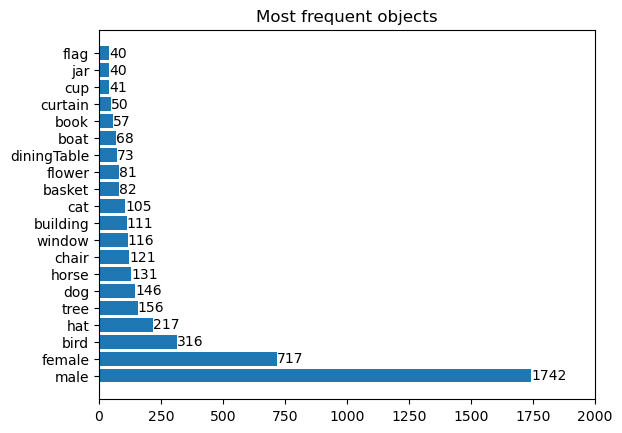

In [14]:
# Bar plot for 20 most frequent objects
x, y = [], []
for i in range(20):
    key = list(sorted_dict.keys())[i]
    x.append(sorted_dict[key])
    y.append(key)
fig, ax = plt.subplots()
bars = ax.barh(y, x)
ax.bar_label(bars)
plt.xlim([0,2000])
plt.title("Most frequent objects")
plt.show()

**Plot first 9 images**

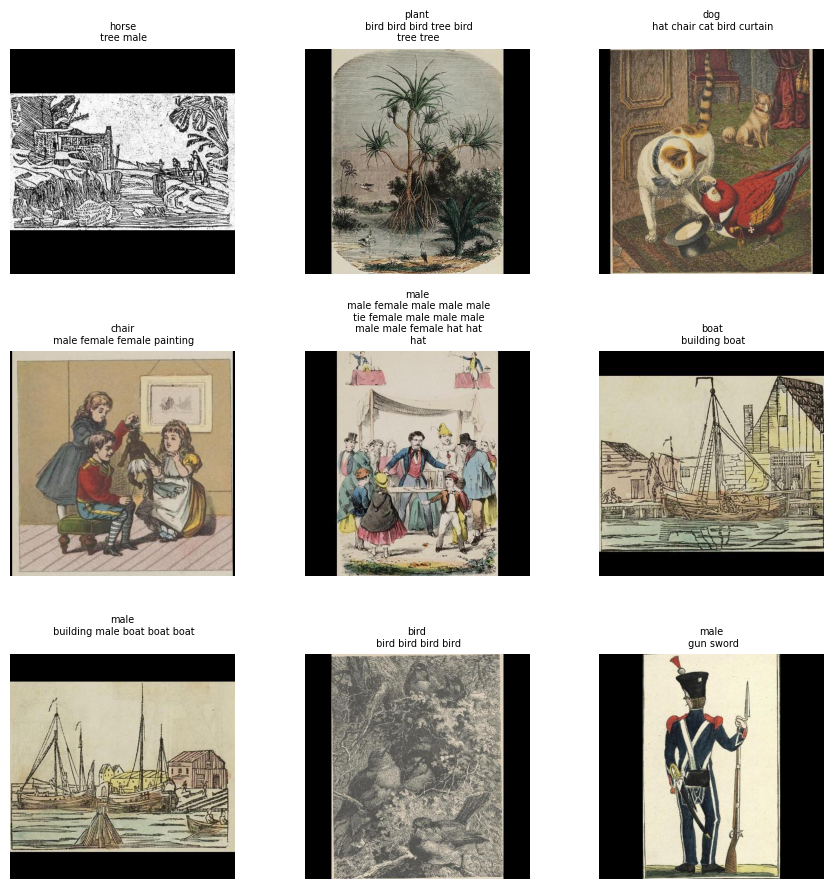

In [35]:
n = 9

# Get labels of first 9 images
labels_gen = (open(os.path.join(directory_labels, f)) for f in files_labels[:n])
labels_gen = (f.read().split('\n') for f in labels_gen)
labels = [[int(i.split()[0]) for i in f] for f in labels_gen]
labels = [[classes[i] for i in l] for l in labels]
labels = [[i + '\n' if index % 5 == 0 else i for index, i in enumerate(l)] for l in labels]

#Plot 9 images from the first batch
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
for i in range(n):
    img = cv2.imread(os.path.join(directory_images, files_images[i]))
    ax = axs[i //3][i % 3]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    ax.axis('off')
    ax.set_title(' '.join(labels[i]),fontsize=7)

plt.tight_layout()
plt.show()